# Problem Set 3



Team: 
    Lea Schmierer 3546563;
    Angelina Basova 3704658;
    Daniel Knorr 3727033

## Exercise 1


You can find the solution of this exercise in the zip file as a pdf. 

## Exercise 2

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sympy import *


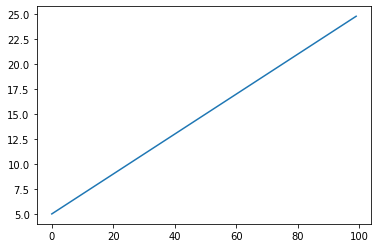

In [10]:
def func(x):
    return 0.2*x + 5


x_values = np.arange(100)
y_values = [func(x_values) for x_values in x_values]

plt.plot(x_values, y_values)
plt.show()


In [11]:
# get data points of above linear function
data = np.vstack((x_values, y_values)).T
data


array([[ 0. ,  5. ],
       [ 1. ,  5.2],
       [ 2. ,  5.4],
       [ 3. ,  5.6],
       [ 4. ,  5.8],
       [ 5. ,  6. ],
       [ 6. ,  6.2],
       [ 7. ,  6.4],
       [ 8. ,  6.6],
       [ 9. ,  6.8],
       [10. ,  7. ],
       [11. ,  7.2],
       [12. ,  7.4],
       [13. ,  7.6],
       [14. ,  7.8],
       [15. ,  8. ],
       [16. ,  8.2],
       [17. ,  8.4],
       [18. ,  8.6],
       [19. ,  8.8],
       [20. ,  9. ],
       [21. ,  9.2],
       [22. ,  9.4],
       [23. ,  9.6],
       [24. ,  9.8],
       [25. , 10. ],
       [26. , 10.2],
       [27. , 10.4],
       [28. , 10.6],
       [29. , 10.8],
       [30. , 11. ],
       [31. , 11.2],
       [32. , 11.4],
       [33. , 11.6],
       [34. , 11.8],
       [35. , 12. ],
       [36. , 12.2],
       [37. , 12.4],
       [38. , 12.6],
       [39. , 12.8],
       [40. , 13. ],
       [41. , 13.2],
       [42. , 13.4],
       [43. , 13.6],
       [44. , 13.8],
       [45. , 14. ],
       [46. , 14.2],
       [47. ,

In [13]:
def get_polynomial(d: int):
    coefficients = np.ones(d+1)  # randomly initialize coeeficient with ones
    polynomial = np.poly1d(coefficients)
    return polynomial


In [14]:
#sample data
data = np.vstack((x_values, y_values)).T


#degree, please use degree 1 as the data is created for a linear function
d = int(input())

#define polynomial function, get coefficients and exponents
polynomial = get_polynomial(d)  # use polynomial for the degrees
print("polynomial: ", polynomial)
w = polynomial.coefficients
x, y = Symbol('x'), Symbol('y')
coef = np.array([Symbol('w_'+str(i)) for i, c in enumerate(polynomial.c)])
exp = np.arange(start=d, stop=-1, step=-1)


#learning rate
a =0.001


# helper variables for gradient descent
smallest_Q = np.inf
Qi = np.empty((0,d+1))
Q = 100000000 # set to random high number in order to execute first iteration of while loop


#gradient descent algorithm
while Q < smallest_Q:
    smallest_Q = Q
    Qi = np.empty((0, 2))

    # get objective function which includes sum of squared errors (SSE)
    f = (np.sum(coef * x**exp) - y)**2
    
    #compute partial derivate based on each coefficient
    f_derivatives = [diff(f, c) for c in coef]

    # compute Qi for every data point
    for x_value, y_value in data:
        derivative_array = np.zeros((d+1, 1))
        for derivative in f_derivatives:
            der_result = derivative.subs('x', x_value).subs('y', y_value).subs('w_0', w[0]).subs("w_1", w[1])
            derivative_array = np.append(derivative_array, np.array([der_result]))
        
        Qi = np.append(Qi, derivative_array)
            
    
    Q = np.sum(Qi) 
 
    #compute new coefficients
    w = w - a*Q


print("optimal coefficients: ", w)

polynomial:   
1 x + 1
optimal coefficients:  [-224701915.975200 -224701915.975200]


This approach is generalized for arbitrary degree d. Also the points n are flexible as long as they are delivered in a np.array. In our implementation we cant find the error, however we suspect that the stopping criterion isn't implemented properly. However, the derivatives work correctly and are flexible for each degree d.

## Exercise 3

In [1]:
from pyspark.sql import SparkSession
from pyspark.mllib.recommendation import ALS, MatrixFactorizationModel, Rating

######################
# 3a)
print("Exercise 3a)")
######################

sparkSession = SparkSession.builder.appName('A3E3').getOrCreate()
sc = sparkSession.sparkContext

# Load and parse the data
data = sc.textFile('./movielens.txt')
ratings = data.map(lambda x: x.split("\t")).map(lambda p: Rating(
    int(p[0]), int(p[1].strip()), float(p[2].strip())))

print("Gesamt: ", ratings.count())

(training, test) = ratings.randomSplit((0.5, 0.5), seed=12345)
print("training: ", training.count())
print("remaining: ", test.count())

Exercise 3a)


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/11/14 21:23:25 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Gesamt:  100000
training:  50255
remaining:  49745


In [2]:
######################
# 3b)
print("Exercise 3b)")
######################

# Train the ratings using ALS
rank = 10
iterations = 5
model = ALS.train(ratings, rank, iterations, 0.01)
# Save the model
model.save(sc, "./movielens.model")

Exercise 3b)


22/11/14 21:23:32 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
22/11/14 21:23:32 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS
22/11/14 21:23:32 WARN InstanceBuilder$JavaBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.VectorBLAS
22/11/14 21:23:32 WARN InstanceBuilder$NativeLAPACK: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK


Py4JJavaError: An error occurred while calling o75.save.
: org.apache.hadoop.mapred.FileAlreadyExistsException: Output directory file:/Users/angelinabasova/Projects/GitHub-repos/MiningMassiveDatasets/Uebung - 3/movielens.model/metadata already exists
	at org.apache.hadoop.mapred.FileOutputFormat.checkOutputSpecs(FileOutputFormat.java:131)
	at org.apache.spark.internal.io.HadoopMapRedWriteConfigUtil.assertConf(SparkHadoopWriter.scala:299)
	at org.apache.spark.internal.io.SparkHadoopWriter$.write(SparkHadoopWriter.scala:71)
	at org.apache.spark.rdd.PairRDDFunctions.$anonfun$saveAsHadoopDataset$1(PairRDDFunctions.scala:1091)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:406)
	at org.apache.spark.rdd.PairRDDFunctions.saveAsHadoopDataset(PairRDDFunctions.scala:1089)
	at org.apache.spark.rdd.PairRDDFunctions.$anonfun$saveAsHadoopFile$4(PairRDDFunctions.scala:1062)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:406)
	at org.apache.spark.rdd.PairRDDFunctions.saveAsHadoopFile(PairRDDFunctions.scala:1027)
	at org.apache.spark.rdd.PairRDDFunctions.$anonfun$saveAsHadoopFile$3(PairRDDFunctions.scala:1009)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:406)
	at org.apache.spark.rdd.PairRDDFunctions.saveAsHadoopFile(PairRDDFunctions.scala:1008)
	at org.apache.spark.rdd.PairRDDFunctions.$anonfun$saveAsHadoopFile$2(PairRDDFunctions.scala:965)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:406)
	at org.apache.spark.rdd.PairRDDFunctions.saveAsHadoopFile(PairRDDFunctions.scala:963)
	at org.apache.spark.rdd.RDD.$anonfun$saveAsTextFile$2(RDD.scala:1599)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:406)
	at org.apache.spark.rdd.RDD.saveAsTextFile(RDD.scala:1599)
	at org.apache.spark.rdd.RDD.$anonfun$saveAsTextFile$1(RDD.scala:1585)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:406)
	at org.apache.spark.rdd.RDD.saveAsTextFile(RDD.scala:1585)
	at org.apache.spark.mllib.recommendation.MatrixFactorizationModel$SaveLoadV1_0$.save(MatrixFactorizationModel.scala:389)
	at org.apache.spark.mllib.recommendation.MatrixFactorizationModel.save(MatrixFactorizationModel.scala:213)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:77)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:568)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:833)


In [ ]:
######################
# 3c)
print("Exercise 3c)")
######################

# Predict rating if the test data
testdata = ratings.map(lambda p: (p[0], p[1]))
predictions = model.predictAll(testdata).map(lambda r: ((r[0], r[1]), r[2]))
ratesAndPreds = ratings.map(lambda r: ((r[0], r[1]), r[2])).join(predictions)
MSE = ratesAndPreds.map(lambda r: (r[1][0] - r[1][1]) ** 2).mean()
print("Mean Squared Error = " + str(MSE))

Exercise 3c)


Mean Squared Error = 0.5127118713514301


## Exercise 4

In [3]:
######################
# 4a)
print("Exercise 4a)")
######################
try:
    import numpy
except:
    print ("This implementation requires the numpy module.")
    exit(0)


"""
@INPUT:
    R     : a matrix to be factorized, dimension N x M
    P     : an initial matrix of dimension N x K
    Q     : an initial matrix of dimension M x K
    K     : the number of latent features
    steps : the maximum number of steps to perform the optimisation
    alpha : the learning rate
    beta  : the regularization parameter
@OUTPUT:
    the final matrices P and Q
"""
def matrix_factorization(R, P, Q, K, steps=5000, alpha=0.0002, beta=0.02):
    Q = Q.T
    for step in range(steps):
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    eij = R[i][j] - numpy.dot(P[i,:],Q[:,j])
                    for k in range(K):
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])
        eR = numpy.dot(P,Q)
        e = 0
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    e = e + pow(R[i][j] - numpy.dot(P[i,:],Q[:,j]), 2)
                    for k in range(K):
                        e = e + (beta/2) * ( pow(P[i][k],2) + pow(Q[k][j],2) )
        if e < 0.001:
            break
    return P, Q.T


if __name__ == "__main__":
    R = [
        [1,0,3,0,0,5,0,0,5,0,4,0],
        [0,0,5,4,0,0,4,0,0,2,1,3],
        [2,4,0,1,2,0,3,0,4,3,5,0],
        [0,2,4,0,5,0,0,4,0,0,2,0],
        [0,0,4,3,4,2,0,0,0,0,2,5],
        [1,0,3,0,3,0,0,2,0,0,4,0]
        ]

    R = numpy.array(R)

    N = len(R)
    M = len(R[0])
    K = 3

    P = numpy.random.rand(N,K)
    Q = numpy.random.rand(M,K)

    nP, nQ = matrix_factorization(R, P, Q, K)
    nR= numpy.dot(nP, nQ.T)

    print('P:')
    print(nP)

    print('Q:')
    print(nQ.T)

    print("No I don't obtain the same matrices Q and P as shown in the lecture, because I don't have fix numbers. The optimization starts on random numbers.")

    print('R:')
    print(nR)


Exercise 4a)
P:
[[ 0.75175598  0.12812166  2.24652168]
 [-0.15693611  1.95237377  1.73831323]
 [ 1.47900215 -0.45004142  1.9101218 ]
 [ 1.49681223  1.72829472  0.65168349]
 [ 1.40564374  1.44930913  0.6395636 ]
 [ 1.46840435  0.26076888  1.44304214]]
Q:
[[ 0.51921989  0.65144607  0.57833395  0.2882744   1.19011127  0.48772881
   0.63460532  0.85517553  0.73608478  1.15015024  1.43961485  2.17550322]
 [ 0.08516654 -0.02071103  1.55542668  1.50229853  1.54622336  0.03782491
   0.95679087  1.35371644  1.01757407  0.42687761 -0.58720874  0.79611762]
 [ 0.3830403   1.57723715  1.11198813  0.63993344  0.5173028   2.03970154
   1.28539555  0.38100675  1.83765906  0.77428123  1.34937274  1.06132628]]
No I don't obtain the same matrices Q and P as shown in the lecture, because I don't have fix numbers. The optimization starts on random numbers.
R:
[[1.26174667 4.03037241 3.13215529 1.84681333 2.25490991 4.95373298
  3.48732294 1.67226364 4.81207035 2.65876417 4.03840005 4.12173996]
 [0.75063659

Exercise 4b)
Error:
3.5224659590598986
3.516567741323414
3.51062946240503
3.5046510719378094
3.498632525938525
3.49257378690933
3.4864748239386945
3.480335612801541
3.474156136058503
3.467936383154239
3.461676350514716
3.455376041643401
3.4490354672162664
3.4426546451755486
3.436233600822172
3.429772366906758
3.423270983719147
3.4167294991763453
3.41014796890882
3.403526456345061
3.396865032794325
3.3901637775274818
3.383422777855882
3.376642129208159
3.3698219352048895
3.3629623077310162
3.3560633670059734
3.3491252416514072
3.3421480687564253
3.335131993940287
3.328077171412454
3.320983764029922
3.3138519433517497
3.3066818896907053
3.299473792161955
3.2922278487287118
3.2849442662447688
3.2776232604938396
3.270265056225631
3.262869887188576
3.2554379961591513
3.247969634967711
3.240465064520764
3.2329245548196317
3.2253483849754154
3.2177368432202105
3.2100902269145064
3.2024088425507116
3.194693005752743
3.18694304127163
3.179159282977068
3.1713420738448868
3.1634917659403703
3.155

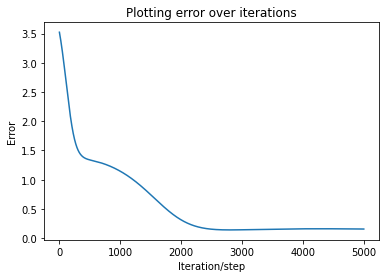

In [4]:
######################
# 4b)
print("Exercise 4b)")
######################
import numpy
import matplotlib.pyplot as plt

def matrix_factorization(R, P, Q, K, steps=5000, alpha=0.0002, beta=0.02):
    Q = Q.T
    error=[]
    print('Error:')
    for step in range(steps):
        
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    eij = R[i][j] - numpy.dot(P[i,:],Q[:,j])
                    for k in range(K):
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])
        eR = numpy.dot(P,Q)
        e = 0
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    e = e + pow(R[i][j] - numpy.dot(P[i,:],Q[:,j]), 2)
                    for k in range(K):
                        e = e + (beta/2) * ( pow(P[i][k],2) + pow(Q[k][j],2) )
                
        print(eij)
        error.append(eij)  

        if e < 0.001:
            break

    plt.plot(error)
    plt.ylabel('Error')
    plt.xlabel('Iteration/step')
    plt.title('Plotting error over iterations')
    plt.show()
    return P, Q.T




if __name__ == "__main__":
    R = [
        [1,0,3,0,0,5,0,0,5,0,4,0],
        [0,0,5,4,0,0,4,0,0,2,1,3],
        [2,4,0,1,2,0,3,0,4,3,5,0],
        [0,2,4,0,5,0,0,4,0,0,2,0],
        [0,0,4,3,4,2,0,0,0,0,2,5],
        [1,0,3,0,3,0,0,2,0,0,4,0]
        ]

    R = numpy.array(R)

    N = len(R)
    M = len(R[0])
    K = 2

    P = numpy.random.rand(N,K)
    Q = numpy.random.rand(M,K)

    nP, nQ = matrix_factorization(R, P, Q, K)
    nR= numpy.dot(nP, nQ.T)


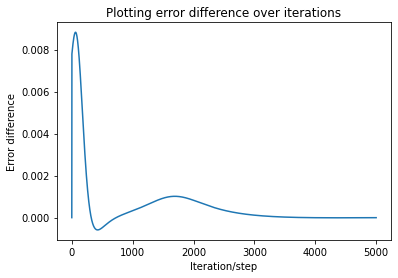

In [5]:
#b)
import numpy
import matplotlib.pyplot as plt

def matrix_factorization(R, P, Q, K, steps=5000, alpha=0.0002, beta=0.02):
    Q = Q.T
    error=[]
    differences=[]
    for step in range(steps):
        
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    eij = R[i][j] - numpy.dot(P[i,:],Q[:,j])
                    for k in range(K):
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])
        eR = numpy.dot(P,Q)
        e = 0
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    e = e + pow(R[i][j] - numpy.dot(P[i,:],Q[:,j]), 2)
                    for k in range(K):
                        e = e + (beta/2) * ( pow(P[i][k],2) + pow(Q[k][j],2) )
                
        if len(error) == 0:
            errordiff = 0
        else:
            errordiff = error.pop()-eij

        differences.append(errordiff)
        error.append(eij)  

        if e < 0.001:
            break

     
    plt.plot(error)
    plt.ylabel('Error')
    plt.xlabel('Iteration/step')
    plt.title('Plotting error over iterations')
    plt.show()
    return P, Q.T




if __name__ == "__main__":
    R = [
        [1,0,3,0,0,5,0,0,5,0,4,0],
        [0,0,5,4,0,0,4,0,0,2,1,3],
        [2,4,0,1,2,0,3,0,4,3,5,0],
        [0,2,4,0,5,0,0,4,0,0,2,0],
        [0,0,4,3,4,2,0,0,0,0,2,5],
        [1,0,3,0,3,0,0,2,0,0,4,0]
        ]

    R = numpy.array(R)

    N = len(R)
    M = len(R[0])
    K = 2

    P = numpy.random.rand(N,K)
    Q = numpy.random.rand(M,K)

    nP, nQ = matrix_factorization(R, P, Q, K)
    nR= numpy.dot(nP, nQ.T)


Exercise 4b)
Error:
3.8882321393982253
3.866063098152778
3.84326118828671
3.8196364433510923
3.7951650887498096
3.769826795060692
3.7436049576050383
3.7164869697192
3.6884644846980157
3.6595336611114364
3.6296953860168206
3.5989554705176223
3.56732481217045
3.534819518930237
3.501460989657412
3.4672759466970486
3.4322964166783585
3.3965596564680007
3.360108022130905
3.322988779789349
3.2852538584008926
3.2469595456685476
3.2081661295180193
3.168937488789288
3.129340637953885
3.0894452317455237
3.049323036542753
3.0090473761341983
2.9686925601012835
2.928333303448504
2.88804414628371
2.8478988822954925
2.8079700044954605
2.7683281762023952
2.729041734563257
2.690176233059744
2.651794028470838
2.6139539166872567
2.5767108206407063
2.5401155324567775
2.504214510801447
2.4690497333002934
2.4346586028955217
2.4010739060922854
2.3683238202507058
2.3364319664155633
2.305417503648406
2.275295260438008
2.246075898511082
2.217766104238311
2.190368802820336
2.1638833905309554
2.1383059804758835
2

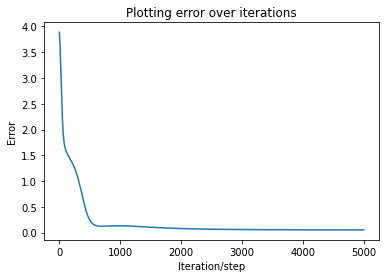

In [8]:
######################
# 4c)

print("Exercise 4c)")
######################

#In order to speed up convergence we don't use a constant learning rate but an adaptive one. 
#Specifically, after every 100 steps we reduce the learning rate by 2%. Therefore, at the beginning the learning rate is at its highest and explores different parameters. 
#Then it decreases and optimizes the best parameters. 
#Hence, we achieve an error of almost 0 after about 800 steps, which is significantly lower than in 4a). In 4a) we achieved a comparable error at after 2500 steps.


import numpy
import matplotlib.pyplot as plt

def matrix_factorization(R, P, Q, K, steps=5000, alpha=0.001, beta=0.02):
    Q = Q.T
    error=[]
    print('Error:')
    for step in range(steps):
        
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    eij = R[i][j] - numpy.dot(P[i,:],Q[:,j])
                    for k in range(K):
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])
        eR = numpy.dot(P,Q)
        e = 0
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    e = e + pow(R[i][j] - numpy.dot(P[i,:],Q[:,j]), 2)
                    for k in range(K):
                        e = e + (beta/2) * ( pow(P[i][k],2) + pow(Q[k][j],2) )
                
        print(eij)
        error.append(eij)  

        if step%100==0:
            alpha -= 0.02*alpha

        if e < 0.001:
            break

    plt.plot(error)
    plt.ylabel('Error')
    plt.xlabel('Iteration/step')
    plt.title('Plotting error over iterations')
    plt.show()
    return P, Q.T




if __name__ == "__main__":
    R = [
        [1,0,3,0,0,5,0,0,5,0,4,0],
        [0,0,5,4,0,0,4,0,0,2,1,3],
        [2,4,0,1,2,0,3,0,4,3,5,0],
        [0,2,4,0,5,0,0,4,0,0,2,0],
        [0,0,4,3,4,2,0,0,0,0,2,5],
        [1,0,3,0,3,0,0,2,0,0,4,0]
        ]

    R = numpy.array(R)

    N = len(R)
    M = len(R[0])
    K = 2

    P = numpy.random.rand(N,K)
    Q = numpy.random.rand(M,K)

    nP, nQ = matrix_factorization(R, P, Q, K)
    nR= numpy.dot(nP, nQ.T)


## Exercise 6 Bonus

#### a)
What would the lists of movies recommended by each system look like?

Does any of the systems G, R and L introduce users to more exotic items from the long tail?
- Yes the system G introduces users to more exotic items from the long tail


#### b)

What system would be most robust to such an attempt? 
- G

Which users' recommendation lists would be affected most?
- L, because it doesn't filter out fake users. It only relies on the amount positive ratings of a movie and whether the user hasn't seen the movie yet.

### c)
Can gray sheep and black sheep benefit from either of the three systems?
- This type of users benefit from L as long as there are other users with the same odd taste. Then the user - user system would provide every recommendation that matches the odd taste of the user.